In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import joypy

In [4]:
df15_19 = pd.read_csv('data/moviedf15_19data.csv')

In [5]:
df10_14 = pd.read_csv('data/movies_2010_to_2014_data.csv')

In [6]:
df15_19 = df15_19.rename(columns={'Unnamed: 0' : 'ry_rank'})

In [7]:
df10_14 = df10_14.rename(columns={'Unnamed: 0' : 'ry_rank'})

In [8]:
df15_19['ry_rank'] = df15_19['ry_rank'].add(1)

In [9]:
df15_19 = df15_19[['ry_rank', 'name', 'rating', 'genre', 'gross', 'release_year']]

In [10]:
df15_19.head()

,ry_rank,name,rating,genre,gross,release_year
0,1,Star Wars: Episode VII - The Force Awakens,PG-13,"Action, Adventure, Sci-Fi",936.66,2015
1,2,Jurassic World,PG-13,"Action, Adventure, Sci-Fi",652.27,2015
2,3,Avengers: Age of Ultron,PG-13,"Action, Adventure, Sci-Fi",459.01,2015
3,4,Inside Out,PG,"Animation, Adventure, Comedy",356.46,2015
4,5,Furious 7,PG-13,"Action, Adventure, Thriller",353.01,2015


In [11]:
df10_14.head()

,ry_rank,name,rating,genre,gross,release_year
0,1,Toy Story 3,G,"Animation, Adventure, Comedy",415.00,2010
1,2,Alice in Wonderland,PG,"Adventure, Family, Fantasy",334.19,2010
2,3,Iron Man 2,PG-13,"Action, Adventure, Sci-Fi",312.43,2010
3,4,The Twilight Saga: Eclipse,PG-13,"Action, Adventure, Crime",300.53,2010
4,5,Harry Potter and the Deathly Hallows: Part 1,PG-13,"Adventure, Family, Fantasy",295.98,2010


In [12]:
totaldf = pd.concat([df10_14, df15_19])

In [12]:
totaldf

,ry_rank,name,rating,genre,gross,release_year
0,1,Toy Story 3,G,"Animation, Adventure, Comedy",415.00,2010
1,2,Alice in Wonderland,PG,"Adventure, Family, Fantasy",334.19,2010
2,3,Iron Man 2,PG-13,"Action, Adventure, Sci-Fi",312.43,2010
3,4,The Twilight Saga: Eclipse,PG-13,"Action, Adventure, Crime",300.53,2010
4,5,Harry Potter and the Deathly Hallows: Part 1,PG-13,"Adventure, Family, Fantasy",295.98,2010
...,...,...,...,...,...,...
245,46,Maleficent: Mistress of Evil,PG,"Adventure, Family, Fantasy",36.95,2019
246,47,The Intruder,PG-13,"Drama, Horror, Mystery",35.42,2019
247,48,The Hustle,PG-13,"Comedy, Crime",35.42,2019
248,49,Ad Astra,PG-13,"Adventure, Drama, Mystery",35.40,2019


In [13]:
totaldf['genre'][(totaldf['release_year'] >= 2015)].iloc[0].split(', ')[0]

'Action'

In [13]:
primg = []
page = list(range(250))
for x in page:
    primg.append(totaldf['genre'].iloc[x].split(', ')[0])

In [14]:
page = list(range(250))
for x in page:
    primg.append(totaldf['genre'][(totaldf['release_year'] >= 2015)].iloc[x].split(', ')[0])

In [15]:
totaldf['primary_genre'] = primg

In [17]:
totaldf

,ry_rank,name,rating,genre,gross,release_year,primary_genre
0,1,Toy Story 3,G,"Animation, Adventure, Comedy",415.00,2010,Animation
1,2,Alice in Wonderland,PG,"Adventure, Family, Fantasy",334.19,2010,Adventure
2,3,Iron Man 2,PG-13,"Action, Adventure, Sci-Fi",312.43,2010,Action
3,4,The Twilight Saga: Eclipse,PG-13,"Action, Adventure, Crime",300.53,2010,Action
4,5,Harry Potter and the Deathly Hallows: Part 1,PG-13,"Adventure, Family, Fantasy",295.98,2010,Adventure
...,...,...,...,...,...,...,...
245,46,Maleficent: Mistress of Evil,PG,"Adventure, Family, Fantasy",36.95,2019,Adventure
246,47,The Intruder,PG-13,"Drama, Horror, Mystery",35.42,2019,Drama
247,48,The Hustle,PG-13,"Comedy, Crime",35.42,2019,Comedy
248,49,Ad Astra,PG-13,"Adventure, Drama, Mystery",35.40,2019,Adventure


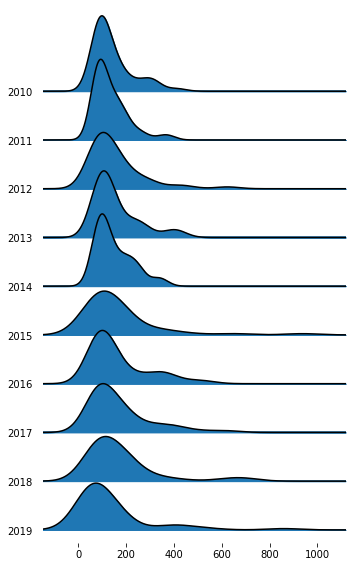

In [18]:
joypy.joyplot(totaldf, by = 'release_year', column = 'gross', figsize = (5,8))
plt.show()

In [82]:
genbygross = totaldf.groupby('primary_genre')['gross'].sum()

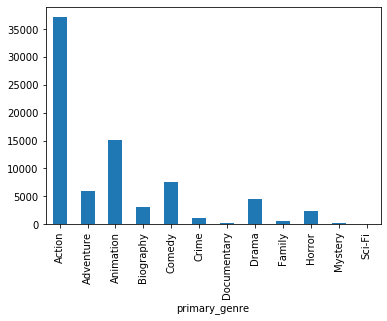

In [84]:
genbygross.plot(kind = 'bar')

In [88]:
ratingbygross = totaldf.groupby('rating')['gross'].sum()

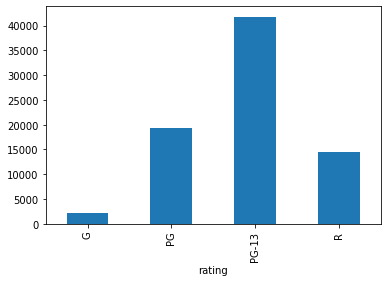

In [91]:
ratingbygross.plot(kind = 'bar')

In [21]:
genre_totals = totaldf['primary_genre'].value_counts()

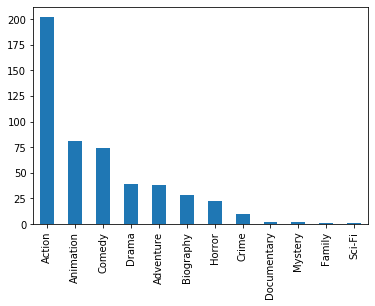

In [22]:
genre_totals.plot(kind = 'bar')

In [46]:
totaldf[(totaldf['ry_rank'] <= 3)]

,ry_rank,name,rating,genre,gross,release_year,primary_genre
0,1,Toy Story 3,G,"Animation, Adventure, Comedy",415.00,2010,Animation
1,2,Alice in Wonderland,PG,"Adventure, Family, Fantasy",334.19,2010,Adventure
2,3,Iron Man 2,PG-13,"Action, Adventure, Sci-Fi",312.43,2010,Action
50,1,Harry Potter and the Deathly Hallows: Part 2,PG-13,"Adventure, Drama, Fantasy",381.01,2011,Adventure
51,2,Transformers: Dark of the Moon,PG-13,"Action, Adventure, Sci-Fi",352.39,2011,Action
52,3,The Twilight Saga: Breaking Dawn - Part 1,PG-13,"Action, Adventure, Drama",281.29,2011,Action
100,1,The Avengers,PG-13,"Action, Adventure, Sci-Fi",623.28,2012,Action
101,2,The Dark Knight Rises,PG-13,"Action, Thriller",448.14,2012,Action
102,3,The Hunger Games,PG-13,"Action, Adventure, Sci-Fi",408.01,2012,Action
150,1,The Hunger Games: Catching Fire,PG-13,"Action, Adventure, Sci-Fi",424.67,2013,Action


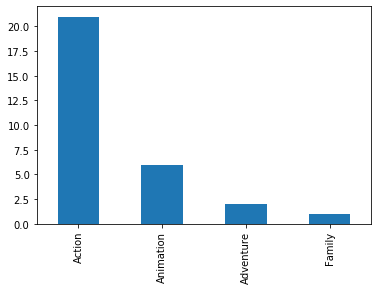

In [48]:
top3moviegchart = top3past.plot(kind = 'bar')

In [52]:
action = totaldf[(totaldf['primary_genre'] == 'Action')]

In [68]:
len(action)

202

In [67]:
action['release_year'].value_counts()

2014    27
2017    22
2018    21
2016    21
2012    20
2010    20
2015    19
2011    19
2013    18
2019    15
Name: release_year, dtype: int64

In [60]:
action.describe()

,ry_rank,gross,release_year
count,202.000000,202.000000,202.000000
mean,22.836634,183.968366,2014.450495
std,15.054397,146.726839,2.785896
min,1.000000,32.140000,2010.000000
25%,9.250000,85.737500,2012.000000
50%,22.000000,130.870000,2014.000000
75%,36.000000,224.547500,2017.000000
max,50.000000,936.660000,2019.000000


In [96]:
mop = copydf.groupby(['primary_genre', 'rating'])['gross'].median().head(9)

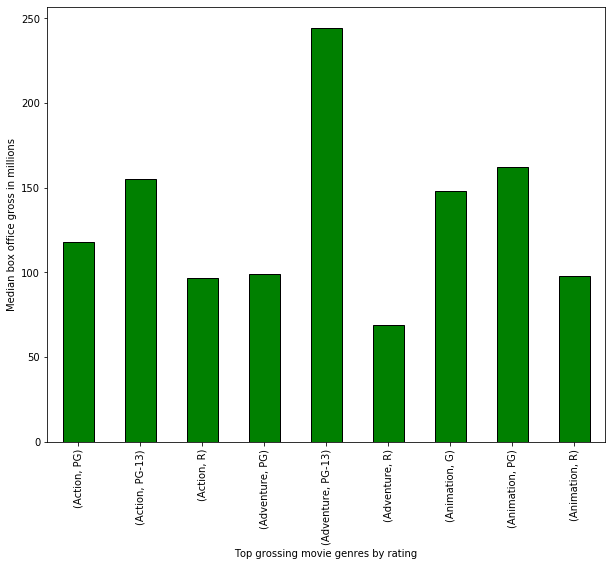

<Figure size 432x288 with 0 Axes>

In [105]:
mop.plot(kind = 'bar', color = 'green', edgecolor = 'black', figsize = (10,8))
plt.xlabel('action, animation, adventure by rating')
plt.ylabel('Median box office gross in millions')
plt.show()
plt.savefig(fname='mediangross_by_genre.png', format='png');

In [16]:
totaldf.groupby(['primary_genre', 'rating'])['gross'].median().head(21)

primary_genre  rating
Action         PG        117.710
               PG-13     155.385
               R          96.885
Adventure      PG         99.220
               PG-13     244.580
               R          69.060
Animation      G         148.260
               PG        162.155
               R          97.690
Biography      PG         91.440
               PG-13      95.980
               R          96.370
Comedy         PG         76.445
               PG-13      85.280
               R         100.415
Crime          PG-13     102.830
               R         102.520
Documentary    G          73.010
               R         117.220
Drama          PG         73.860
               PG-13     100.280
Name: gross, dtype: float64

In [26]:
action = totaldf[(totaldf['primary_genre'] == 'Action' )]

In [25]:
animation = totaldf[(totaldf['primary_genre'] == 'Animation' )]

In [27]:
comedy = totaldf[(totaldf['primary_genre'] == 'Comedy' )]

In [28]:
aac = pd.concat([action, animation, comedy])

In [29]:
aac

,ry_rank,name,rating,genre,gross,release_year,primary_genre
2,3,Iron Man 2,PG-13,"Action, Adventure, Sci-Fi",312.43,2010,Action
3,4,The Twilight Saga: Eclipse,PG-13,"Action, Adventure, Crime",300.53,2010,Action
5,6,Inception,PG-13,"Action, Adventure, Sci-Fi",292.58,2010,Action
10,11,The Karate Kid,PG,"Action, Drama, Family",176.59,2010,Action
11,12,Tron,PG,"Action, Adventure, Sci-Fi",172.06,2010,Action
...,...,...,...,...,...,...,...
226,27,Tyler Perry's A Madea Family Funeral,PG-13,Comedy,73.26,2019,Comedy
235,36,What Men Want,R,"Comedy, Fantasy, Romance",54.61,2019,Comedy
236,37,Isn't It Romantic,PG-13,"Comedy, Fantasy, Romance",48.79,2019,Comedy
242,43,Little,PG-13,"Comedy, Fantasy, Romance",40.67,2019,Comedy


In [30]:
aac.groupby(['primary_genre', 'rating'])['gross'].median().head(21)

primary_genre  rating
Action         PG        117.710
               PG-13     155.385
               R          96.885
Animation      G         148.260
               PG        162.155
               R          97.690
Comedy         PG         76.445
               PG-13      85.280
               R         100.415
Name: gross, dtype: float64

In [31]:
topg = aac.groupby(['primary_genre', 'rating'])['gross'].median().head(21)

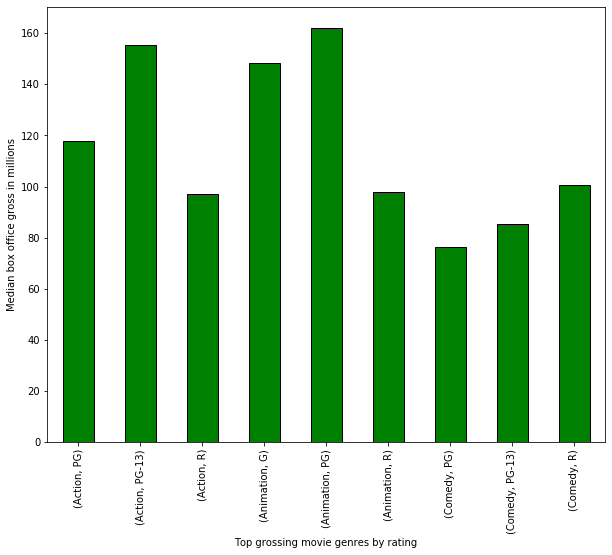

<Figure size 432x288 with 0 Axes>

In [32]:
topg.plot(kind = 'bar', color = 'green', edgecolor = 'black', figsize = (10,8))
plt.xlabel('Top grossing movie genres by rating')
plt.ylabel('Median box office gross in millions')
plt.show()
plt.savefig(fname='mediangross_by_genre.png', format='png');